In [1]:
import torch
from torch.utils.data import Dataset
from torchvision.transforms import v2

import numpy as np
import matplotlib.pyplot as plt
from skimage import io

import os

# Visualizing New York maps dataset

In [20]:
class MapDataset(Dataset):
    def __init__(self, root_dir, transforms=None):
        self.root_dir = root_dir
        self.transforms = transforms

    def __len__(self):
        return len(os.listdir(self.root_dir))

    def __getitem__(self, idx):
        idx = idx + 1
        print("index: ", idx)
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, str(idx) + '.jpg')
        image = io.imread(img_name)
        satellite = image[:, :600, :]
        map = image[:, 600:, :]

        if self.transforms:
            satellite = self.transforms(satellite)
            map = self.transforms(map)

        return satellite, map

index:  1
1 (600, 600, 3) (600, 600, 3)
index:  2
2 (600, 600, 3) (600, 600, 3)
index:  3
3 (600, 600, 3) (600, 600, 3)
index:  4
4 (600, 600, 3) (600, 600, 3)


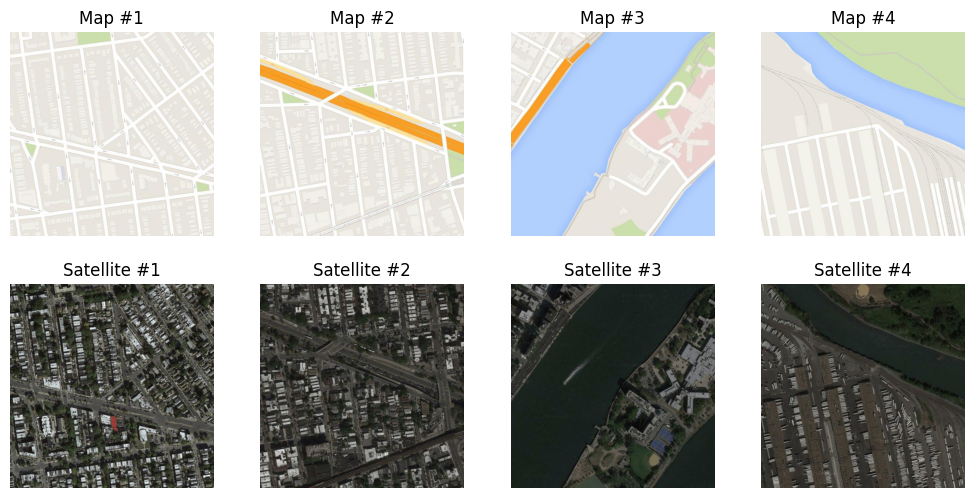

In [33]:
transforms = v2.Compose([
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[127.5, 127.5, 127.5], std=[127.5, 127.5, 127.5]),
])
train_dataset = MapDataset(root_dir='../data/raw/maps_ny/train', transforms=transforms)
fig = plt.figure(figsize=(10, 10))

for i, (sat, map) in enumerate(train_dataset):
    i = i + 1
    print(i, sat.shape, map.shape)

    ax = plt.subplot(1, 4, i)
    plt.tight_layout()
    ax.set_title('Satellite #{}'.format(i))
    ax.axis('off')
    plt.imshow(sat.astype(np.uint8))

    ax = plt.subplot(2, 4, i)
    plt.tight_layout()
    ax.set_title('Map #{}'.format(i))
    ax.axis('off')
    plt.imshow(map.astype(np.uint8))

    print(f"satellite array: {sat}")
    print(f"map array: {map}")

    if i == 4:
        plt.show()
        break